# 👷CASE MStar: Projeto de Perfuração de Poços

## 1. 🗒️ Documentação
> Autor: Millena Thalyne <br>
> Data: 27/12/2023 <br>
> Linguagem de Programação: Python <br>
> Banco de Dados: SQL Server <br>

## 2. 📖 Objetivo 
* Esse projeto tem como objetivo dar continuidade no processo seletivo para a vaga de Cientista de Dados na **Morning Star Consulting**;
* A partir deste, foi proposto um desafio ao qual deve-se criar um modelo de Machine Learning, utilizando a base de dados 'dados_pocos.csv' para, dado uma entrada (com características de um projeto de perfuração de poços) este algoritmo deve exibir uma lista de quatro poços correlatos a este;
* Além disso, esta base de dados deve ter uma conexão com um banco de dados relacional, responsável por trazê-lo para este ambiente de desenvolvimento.

### 2.1 🎲 Base de Dados 
* A base de dados utilizada é a 'dados_pocos.csv' que apresenta uma série de características referentes a projetos de perfuração de poços;
* Esses projetos são divididos em **fases**, além de separados por **tipo** (Vertical ou Horizontal); 
* As demais variáveis presentes nesses dados, são:
    * Nome: Nome que identifica o projeto do poço
    * Fase: É o número da fase. Um projeto é dividido em fases.
    * Tipo Poço: Existem aqui 2 tipos de poços VERTICAL ou HORIZONTAL.
    * LDA (Lâmina D'Água): LDA é o valor em metros, que corresponde a distância entre a superfície
    do mar até o ponto de perfuração em poços subaquático.
    * Diâmetro Fase: Para cada fase da perfuração pode-se usar uma broca com diâmetro diferente.
    Aqui o diâmetro é descrito em polegadas.
    * Metragem: Valor em metros que corresponde ao total perfurado naquela fase.
    * NFases: Corresponde ao número total de fases que o projeto exigiu. <br>

*Informações disponibilizadas na documentação oficial do desafio.* 

### 2.2 🎲 Banco de Dados
* O banco de dados utilizado foi o **SQL Server**, um dos bancos mais utilizados para quem precisa armazenar dados sem se preocupar com escalabilidade e velocidade de resgate destes (características visíveis em bancos de dados não-relacionais, muito utilizado em aplicações web, por exemplo); 
* A escolha desse banco em especial se dá pela facilidade de configuração e conexão *host* local, atual situação durante criação deste projeto.

## 5. 📊 Análise de Dados
### 5.1 Variável 'Diâmetro Fase'
* Assim que é visto pela primeira vez os dados, é visualizado de primeira a medida da variável "Diâmetro Fase", em polegadas, sendo que as demais estão em metros. Poranto, é essencial, no passo de normalização de dados mais afrente, fazer uma conversão desses dados, tanto para decimal, quanto para metros. 
### 5.2 Fases
* Cada projeto é dividido em fases, sendo cada fase com características distintas de tamanho de LDA, metragem, etc;
* A quantidade de fases é bem distinta, não existindo um número recorrente de fases para cada projeto. Portanto, é possível ter 1 ou mais fases para conclusão de um projeto de perfuração de poços. 
### 5.3 Variável 'Tipo Poço'
* Mesmo na documentação dizer que só existem duas classes de tipos para poço, basta dar uma olhada rápida pelos dados para notar que existem ainda um outro tipo chamado DIRECIONAL e o que não for nenhum dos três descritos, está denominado com um 0.

## 4. 📝 Importação de Bibliotecas e Conexão com Banco de Dados Local
* Aqui será todas as bibliotecas Python utilizadas nesse projeto, além do código utilizado para fazer conexão com o banco de dados SQL Server local.

### 4.1 Bibliotecas Utilizadas

In [1]:
#Bibliotecas utilizadas nesse projeto
import pyodbc
import pandas as pd
import seaborn as sns
import numpy as np
import matplotlib.pyplot as plt
import cufflinks as cf
import plotly.graph_objs as go
import plotly.io as pio
from sqlalchemy import create_engine
from pint import UnitRegistry
from fractions import Fraction
from sklearn.neighbors import KNeighborsClassifier
from sklearn import tree
from sklearn.model_selection import GridSearchCV
from sklearn.metrics import accuracy_score, confusion_matrix, precision_score, recall_score, f1_score
from sklearn.metrics import mean_squared_error, mean_absolute_error
from sklearn.model_selection import StratifiedShuffleSplit
from sklearn.preprocessing import StandardScaler

### 4.2 Conexão Banco de Dados Local 

In [2]:
#Dados de conexão com o banco de dados SQL Server
dados_conexao = (
    "Driver={SQL SERVER};"
    "Server=Lina;"
    "Database=CASEMStar;"
)

#Criando conexão com o banco de dados
conexao = pyodbc.connect(dados_conexao)
print("Conexão bem sucedida! =D")

Conexão bem sucedida! =D


### 4.3 Tranformação Tabela em DataFrame
* Código utilizado para fazer a conversão da tabela em DataFrame.

In [3]:
#Criando uma engine SQLAlchemy usando a conexão pyodbc
engine = create_engine("mssql+pyodbc:///?odbc_connect=" + dados_conexao)

#Comando SQL para chamar todos os dados da tabela 'dados_pocos'
comando = """SELECT * FROM dbo.projeto_pocos;"""

#Transformando tabela em dataframe
df = pd.read_sql(comando, con=engine)

## 5. 📉 Distribuição de Dados
* Uma breve visualização dos dados de maneira geral para ver como os dados de classe (Tipo Poço) está distribuído.

### 5.1 Gráfico de Distribuição 
* Esse gráfico fará uma verificação da distribuições de categorias para o poço;
* Para isso, é utilizado o gráfico de histograma da biblioteca Seaborn.

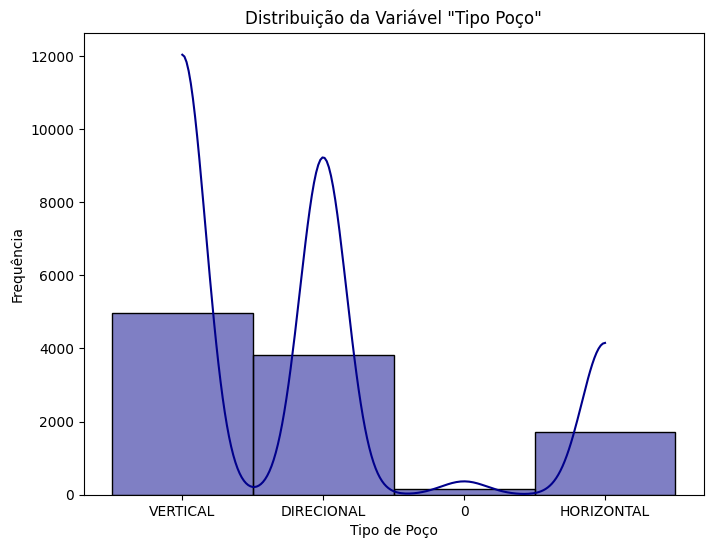

In [4]:
# Exemplo: Histograma para uma única coluna (Feature1)
plt.figure(figsize=(8, 6))
sns.histplot(df['Tipo Poço'], bins=10, kde=True, color='darkblue')
plt.title('Distribuição da Variável "Tipo Poço"')
plt.xlabel('Tipo de Poço')
plt.ylabel('Frequência')
plt.show()

### 5.2 Gráfigo de Histograma com Ploty
* A utilização dessa ferramenta de visualização de dados do Python é uma maneira de transformar os gráficos mais interativos, pois basta passar o cursor por cima das barras para ter mais informações dos dados.

In [5]:
#Necessário habilitar o modo offline (Se não, entrar com a conta do Chart Studio)
cf.go_offline()

df['Tipo Poço'].iplot(kind='hist')

### 5.3 Melhorando Gráfico Plotly
* Apenas alguns ajustes de customização para deixar o gráfico mais agradável visualmente. 

In [6]:
#Necessário habilitar o modo offline
cf.go_offline()

#Lista de cores para cada coluna do gráfico
cores = ['lightgreen', 'lightgreen', 'red', 'lightgreen']

#Criação do histograma com a variável 'Tipo Poço'
data = [
    go.Histogram(
        x=df['Tipo Poço'], 
        marker={
            'color': cores,
            'line': {'color': '#333', 
                     'width': 2}
                }, 
        opacity=0.75
        )]

#Layout de customização do gráfico
layout = go.Layout(
    title='Histograma da Variável "Tipo de Poço"',
    xaxis=dict(title='Tipo de Poço'),
    yaxis=dict(title='Frequência'),
    bargap=0.2  # Espaço entre as barras
)

#Criação da figura para mostrar na tela
fig = go.Figure(data=data, layout=layout)

#Exibir o gráfico offline
pio.show(fig)

## 6. 🖥️ Pré-Processamento dos Dados e Normalização
* Fase onde serão feito alterações nas variáveis julgadas com irregularidades.

### 6.1 Renomeando coluna de LDA para padronização.

In [7]:
#Ajuste de nome de variável
df.rename(columns={'LDA (Lâmina D\'Água)': 'LDA (Lâmina D\'Água)'}, inplace=True)

### 6.2 Tratamento da Variável 'Diâmetro Fase'
* Como mencionado anteriormente, essa variável está em polegadas, juntamente com unidades de fração, portanto é necessário fazer essa conversão para ajustá-los. 

In [8]:
#Atribuição de variável global para variável presente no df
valores_em_polegadas = df['Diâmetro Fase']

#Função para converter valores de polegadas para decimais
def converter_para_decimal(valor_em_polegadas):
    #Divisão da string de entrada
    partes = valor_em_polegadas.split(' ')
    #Verifica se a primeira parte da string (antes do primeiro espaço em branco) é não vazia;
    #Se não for vazia, converte essa parte para um número inteiro e atribui à variável inteiro;
    #Se for vazia, define inteiro como 0.
    if partes[0]:
        inteiro = int(partes[0])
    else:
        inteiro = 0
    #Verifica se há mais de uma parte na lista partes (ou seja, se há pelo menos uma parte após o primeiro espaço em branco) e se a segunda parte não é vazia;
    #Se essas condições forem atendidas, converte a segunda parte para um objeto Fraction (fração) e atribui à variável fracao;
    #Em seguida, retorna a soma do valor inteiro e o valor da fração convertida para um número decimal (float);
    #Se não houver segunda parte ou se a segunda parte for vazia, retorna apenas o valor inteiro convertido para um número decimal (float).
    if len(partes) > 1 and partes[1]:
        fracao = Fraction(partes[1])
        return float(inteiro + fracao)
    else:
        return float(inteiro)

#Aplicando a função para cada valor não vazio da variável criada anteriormente
df['Diâmetro Fase'] = [converter_para_decimal(valor) for valor in valores_em_polegadas if valor]
df


,Coluna 0,Nome do Poço,Fase,Tipo Poço,LDA (Lâmina D'Água),Diâmetro Fase,Metragem,NFases
0,0,6C5G4M,1,VERTICAL,598.0,26.00,607.0,4
1,1,6C5G4M,2,VERTICAL,598.0,17.50,1306.0,4
2,2,6C5G4M,3,VERTICAL,598.0,12.25,1201.0,4
3,3,6C5G4M,4,VERTICAL,598.0,8.50,1445.0,4
4,4,8030JC,1,VERTICAL,0.0,17.50,410.0,3
...,...,...,...,...,...,...,...,...
10644,10644,E25RS3,1,0,0.0,30.00,60.0,1
10645,10645,AR3826,1,0,0.0,30.00,50.0,1
10646,10646,XO8Q23,1,0,1282.0,36.00,56.0,1
10647,10647,7RK405,1,0,0.0,26.00,49.0,1


### 6.3 Normalização da Variável 'Diâmetro Fase' em Metros

* Agora, convertido em decimal, o próximo passo é transformar esses dados em metros para se igualar as demais variáveis da base de dados.

In [9]:
#Instância do objeto UnitRegistry para conversão 
ureg = UnitRegistry()

#Agora, aplicamos a conversão de unidade utilizando uma função lambda com o objetivo de converter a quantidade resultante para metros.
df['Diâmetro Fase'] = df['Diâmetro Fase'].apply(lambda x: (x * ureg.inch).to(ureg.meter).magnitude)
df

,Coluna 0,Nome do Poço,Fase,Tipo Poço,LDA (Lâmina D'Água),Diâmetro Fase,Metragem,NFases
0,0,6C5G4M,1,VERTICAL,598.0,0.66040,607.0,4
1,1,6C5G4M,2,VERTICAL,598.0,0.44450,1306.0,4
2,2,6C5G4M,3,VERTICAL,598.0,0.31115,1201.0,4
3,3,6C5G4M,4,VERTICAL,598.0,0.21590,1445.0,4
4,4,8030JC,1,VERTICAL,0.0,0.44450,410.0,3
...,...,...,...,...,...,...,...,...
10644,10644,E25RS3,1,0,0.0,0.76200,60.0,1
10645,10645,AR3826,1,0,0.0,0.76200,50.0,1
10646,10646,XO8Q23,1,0,1282.0,0.91440,56.0,1
10647,10647,7RK405,1,0,0.0,0.66040,49.0,1


### 6.4 Tratamento de Tipos 
* Essa etapa é responsável por normalizar os tipos de dados presentes nas variáveis da base de dados.

In [10]:
#Conversão da variável 'Coluna 0' em inteiro
df['Coluna 0'] = df['Coluna 0'].astype(int)

In [11]:
#Conversão da variável 'Fase' em inteiro
df['Fase'] = df['Fase'].astype(int)

In [12]:
#Conversão da variável 'LDA (Lâmina D'Água)' em float
df['LDA (Lâmina D\'Água)'] = df['LDA (Lâmina D\'Água)'].astype(float)

In [13]:
#Conversão da variável 'NFases' em inteiro
df['NFases'] = df['NFases'].astype(int)

In [14]:
#Conversão da variável 'Metragem' em float
df['Metragem'] = df['Metragem'].astype(float)

In [15]:
#Verificação de tipos do DataFrame
df.dtypes

Coluna 0                 int32
Nome do Poço            object
Fase                     int32
Tipo Poço               object
LDA (Lâmina D'Água)    float64
Diâmetro Fase          float64
Metragem               float64
NFases                   int32
dtype: object

### 6.5 Preparando Variáveis Categóricas:
* Conversão de variável categórica 'Tipo Poço' em numérica;
* Esse passo é necessário para poder passar pelo treinamento do modelo de Machine Learning, pois este só aceita valores numérios. 

In [16]:
#Utilização de um loop para poder visualizar os elementos únicos presentes nessa variável
for i in df['Tipo Poço'].drop_duplicates():    
    print(i)

VERTICAL
DIRECIONAL
0
HORIZONTAL


In [17]:
#Utilizando somente essa parte do código também é possível obter os valores únicos e, também, a primeira vez que apareceram na base
df['Tipo Poço'].drop_duplicates()

0         VERTICAL
47      DIRECIONAL
324              0
1177    HORIZONTAL
Name: Tipo Poço, dtype: object

In [18]:
#Criação de dicionário para fazer o mapeamento das categorias em numéricas
categorias_tipos = {
    '0': 0,
    'VERTICAL': 1,
    'DIRECIONAL': 2,
    'HORIZONTAL': 3,
}

df['Tipo Poço'] = df['Tipo Poço'].map(categorias_tipos)

In [19]:
df

,Coluna 0,Nome do Poço,Fase,Tipo Poço,LDA (Lâmina D'Água),Diâmetro Fase,Metragem,NFases
0,0,6C5G4M,1,1,598.0,0.66040,607.0,4
1,1,6C5G4M,2,1,598.0,0.44450,1306.0,4
2,2,6C5G4M,3,1,598.0,0.31115,1201.0,4
3,3,6C5G4M,4,1,598.0,0.21590,1445.0,4
4,4,8030JC,1,1,0.0,0.44450,410.0,3
...,...,...,...,...,...,...,...,...
10644,10644,E25RS3,1,0,0.0,0.76200,60.0,1
10645,10645,AR3826,1,0,0.0,0.76200,50.0,1
10646,10646,XO8Q23,1,0,1282.0,0.91440,56.0,1
10647,10647,7RK405,1,0,0.0,0.66040,49.0,1


Como nesse caso podemos ver a presença de um número 0 entre as categorias, pode-se considerá-lo como 'Não Registrado' também. 

### 6.6 Cópia do DataFrame
* A criação de uma cópia do DataFrame é importante para poder servir como entrada de dados ao final do treinamento do algoritmo.

In [20]:
#Criando cópia do DataFrame original
df_copy = df.copy()

#Exibição do DataFrame de cópia
df_copy

,Coluna 0,Nome do Poço,Fase,Tipo Poço,LDA (Lâmina D'Água),Diâmetro Fase,Metragem,NFases
0,0,6C5G4M,1,1,598.0,0.66040,607.0,4
1,1,6C5G4M,2,1,598.0,0.44450,1306.0,4
2,2,6C5G4M,3,1,598.0,0.31115,1201.0,4
3,3,6C5G4M,4,1,598.0,0.21590,1445.0,4
4,4,8030JC,1,1,0.0,0.44450,410.0,3
...,...,...,...,...,...,...,...,...
10644,10644,E25RS3,1,0,0.0,0.76200,60.0,1
10645,10645,AR3826,1,0,0.0,0.76200,50.0,1
10646,10646,XO8Q23,1,0,1282.0,0.91440,56.0,1
10647,10647,7RK405,1,0,0.0,0.66040,49.0,1


### 6.7 Exclusão de Variáveis 
* Essa etapa é responsável por excluir as variáveis que não passarão pelo modelo:
    * 'Coluna 0';
    * 'Nome do Poço'.

In [21]:
#Lista com o nome das variáveis que serão excluída da base de dados
lista_exclusao = ['Coluna 0', 'Nome do Poço']

#Utilizando a função 'drop' para excluir as variáveis presentes na lista anterior
df.drop(columns=lista_exclusao, inplace=True)

### 6.8 Tratamento de Dados Nulos
* Tratamento de verificação de dados nulos na base, pois este poderiam trazer diversas inconsistências no resultado final do algoritmo.

In [22]:
#Verificar nulos em todo o DataFrame
print(df.isnull().sum())

Fase                   0
Tipo Poço              0
LDA (Lâmina D'Água)    0
Diâmetro Fase          0
Metragem               0
NFases                 0
dtype: int64


Esse tratamento também não é necessário, pois, através do código anterior, é possível notar que não existe nenhum registro nulo, para todas as colunas.

### 6.9 Tratamento de Outliers
* Outliers são dados discrepantes, dados que se distanciam muito dos demais dados presentes no banco; 
* O tratamento destes é de extrema importância para, também, não afetar o resultado final do modelo;
* Para visualizar a distribuição desses dados, é utilizado um gráfico nomeado **boxplot**, este tem como objetivo verificar a mediana dos dados, tais como os quartis. Se a 'caixa' visualizada tiver bem distribuída, é sinal de que os dados estão bem distribuídos. Se não, é necessário um tratamento adequado. 


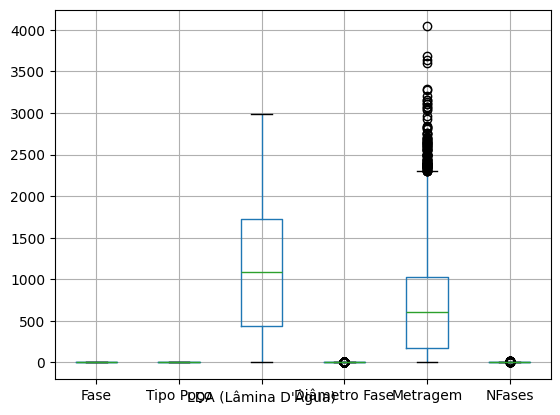

In [23]:
#Visualização da distribuição dos dados dispostos por variável, para isso, utiliza-se o boxplot
df.boxplot()
plt.show()

In [24]:
#Tratamento de outliers para "Metragem"
valor = df['Metragem']
Q1 = valor.quantile(.25)
Q3 = valor.quantile(.75)
IIQ = Q3 - Q1
limite_inferior = Q1 - 1.5 * IIQ
limite_superior = Q3 + 1.5 * IIQ

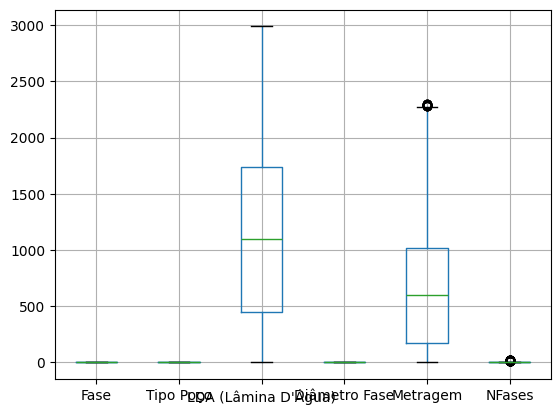

In [25]:
#Inclusão do tratamento dentro do DataFrame df
selecao = (valor >=limite_inferior) & (valor <= limite_superior)
df = df[selecao]

#Visualização do novo boxplot, já com o tratamento
df.boxplot()
plt.show()

Vemos uma grande mudança na 'caixa' presente na visualização do gráfico boxplot após o tratamento de quartis.<br> Esse tratamento é feito a partir de alguns passos, sendo eles: <br>
* Obtenção dos Quartis (Q1 e Q3):
<br>
Q1 = valor.quantile(.25): Calcula o primeiro quartil (25º percentil) dos valores na coluna 'Metragem'. O primeiro quartil é o valor abaixo do qual 25% dos dados estão.<br>
Q3 = valor.quantile(.75): Calcula o terceiro quartil (75º percentil) dos valores na coluna 'Metragem'. O terceiro quartil é o valor abaixo do qual 75% dos dados estão. <br>
* Calculo do Intervalo Interquartil (IIQ):
<br>
IIQ = Q3 - Q1: Calcula o Intervalo Interquartil, que é a diferença entre o terceiro quartil e o primeiro quartil. Representa a dispersão dos dados no intervalo onde a maioria dos dados está concentrada.<br>
* Definição dos Limites Inferior e Superior:
<br>
limite_inferior = Q1 - 1.5 * IIQ: Calcula o limite inferior para identificação de outliers. Qualquer valor abaixo desse limite é considerado um outlier.<br>
limite_superior = Q3 + 1.5 * IIQ: Calcula o limite superior para identificação de outliers. Qualquer valor acima desse limite é considerado um outlier. <br>
* Seleção dos Dados Sem Outliers:
<br>
selecao = (valor >= limite_inferior) & (valor <= limite_superior): Cria uma máscara booleana que seleciona os valores dentro dos limites definidos. <br>
* Criação de um Novo DataFrame sem Outliers:
<br>
df = df[selecao]: Atualiza o DataFrame df para incluir apenas os dados que não foram identificados como outliers, removendo assim os valores fora dos limites.

## 7. 📈 Cálculo de Correlação
* Essa etapa tem como objetivo verificar a correlação entre as variáveis, para isso é utilizado dois coeficientes muito famosos para este propósito: 
    * Coeficiente de Pearson; 
    * Coeficiente de Spearman.

### 7.1 Coeficiente de Pearson
#### A partir dos possíveis valores para *p*, o Coeficiente de Pearson mede da seguinte forma: <br>
* ρ = 0,9 a 1 (positivo ou negativo): correlação muito forte;
* ρ = 0,7 a 0,9 (positivo ou negativo): correlação forte;
* ρ = 0,5 a 0,7 (positivo ou negativo): correlação moderada;
* ρ = 0,3 a 0,5 (positivo ou negativo): correlação fraca;
* ρ = 0 a 0,3 (positivo ou negativo): não possui correlação.

In [27]:
#Correlação geral das variáveis da base de dados
correlacao = df.corr()

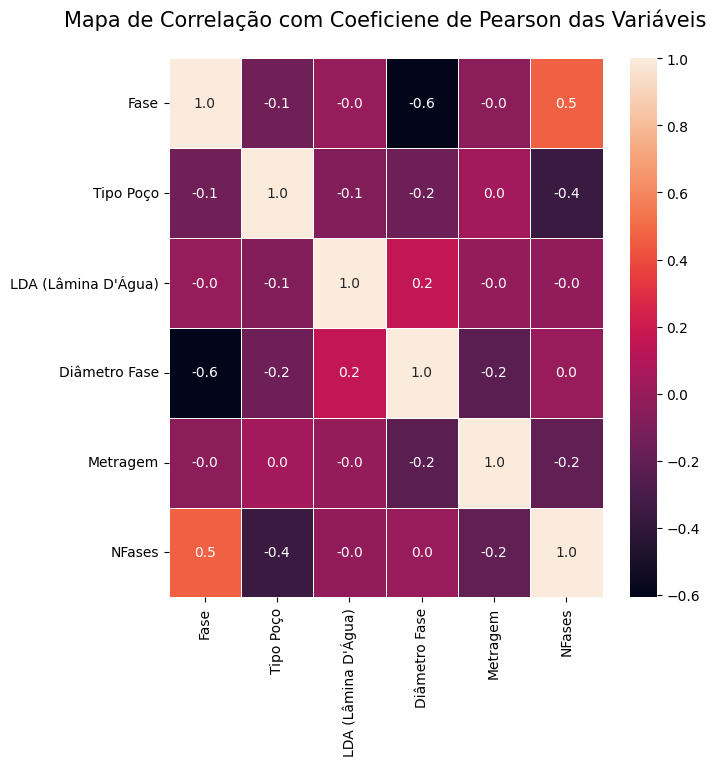

In [28]:
#Heatmap para melhor visualização da correlação entre variáveis usando o Coeficiente de Pearson
plt.figure(figsize = (7,7))
heatmap = sns.heatmap(correlacao, annot = True, fmt=".1f", linewidths=.6)
plt.title("Mapa de Correlação com Coeficiene de Pearson das Variáveis\n", fontsize = 15)
plt.show()

Conforme vimos na explicação anterior, as variáveis que estão dentro da escala de 1 a 0,7 (+ ou -) e na **tonalidade laranja** no caso das *positivas*, e **roxo escuro** no caso das *negativas*, possuem uma **forte correlação**; já as variáveis que estão entre 0,7 a 0,5 (+ ou -) e na **tonalidade avermelhada** no caso das *positivas* e **roxo médio** no caso das *negativas*, possuem **correlação moderada**; as variáveis que possuem escala de 0,5 a 0,25 e (+ ou -) possuem *baixa*; e por fim as variáveis com coeficiente próximo a 0 (+ ou -) e com **tonalidade vermelha** **não possuem correlação**. <br> Dessa forma, a única relação **positiva** presente é entre as variáveis "NFases" e "Fase" (com uma pontuação igual a 0.5) o que faz bastante sentido, pois elas se referem ao mesmo objeto: As fases do projeto de perfuração de poços.<br> Outras variáveis com uma correlação forte, porém **negativa**, é as presentes "Diâmetro Fase" e "Fase", obtendo uma cor roxo escuro (-0.6). <br> Já as demais variáveis são valores inteiros constantes que dependem do projeto em questão, portanto não tendo quase que nenhuma relação entre elas.

### 7.2 Coeficiente de Spearman
#### Bem semelhante ao Coeficiente de Pearson, o Coeficiente de Spearman está analisando se, quando o valor de uma variável aumenta ou diminui, o valor da outra variável aumenta ou diminui. <br> Dessa forma, os possíveis valores de saída para avaliação desse coeficiente se dá da seguinte forma: 
* ρ = 0.8 a 1.0: correlação muito forte.
* ρ = 0.6 a 0.8: correlação forte;
* ρ = 0.4 a 0.6: correlação moderada;
* ρ = 0.2 a 0.4: correlação fraca;
* p = 0 a 0.2: correlação muito fraca;

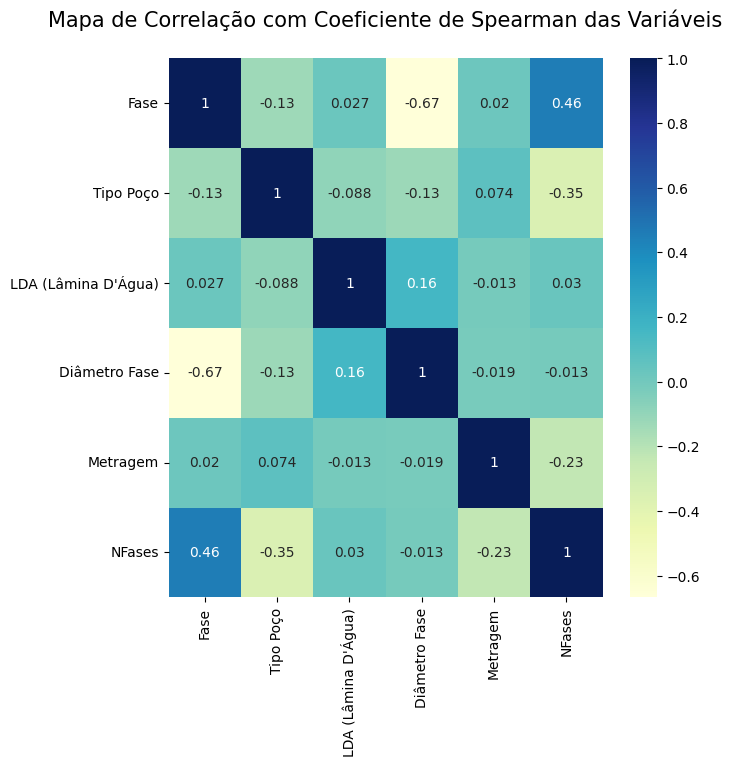

In [29]:
#Heatmap para melhor visualização da correlação entre variáveis usando o Coeficiente de Spearman
plt.figure(figsize = (7,7))
sns.heatmap(df.corr("spearman"), annot = True, cmap = "YlGnBu")
plt.title("Mapa de Correlação com Coeficiente de Spearman das Variáveis\n", fontsize = 15)
plt.show()

Enquanto o coeficiente de correlação de Pearson avalia relações lineares entre as variáveis, o coeficiente de correlação de Spearman avalia relações monótonas, quer estas sejam lineares ou não. <br> Da mesma maneira que foi analisado o resultado do *heatmap* no Coeficiente de Pearson, aqui também segue a mesma linha raciocínio dentro das cores: quanto mais próximo do azul escuro, mais correlação existe. Diante dessa explicação, é possível verificar que sim, existem **correlações moderadas** nas variáveis que apresentam uma cor mais próxima do ciano, porém continua-se tendo uma **correlação muito forte** entre as variáveis "NFases" com "Fase" e "Diâmetro Fase" com "Fase", com isso, os coeficientes calculados tomaram valores semelhantes, e, portanto, a relação entre elas é provavelmente linear.

## 🧠 8. Algoritmo de Machine Learning
* Os algoritmos escolhidos tiveram com base dois critérios: Modelos de classificação e com possibilidade de predição multi-classe, pois essas são as características desse projeto: dado uma série de características de projetos de poços, o modelo deve resgatar poços correlatos a este. 
* Isto posto, agora, partir para a implementação dos algoritmos propostos para este projeto: 
    * K-Nearest Neighbours (KNN);
    * Decision Tree (Árvore de Decisão).

### 8.1 Criação de Métodos para Treinamento e Validação
* Esses métodos serão responsáveis por organizar os passos necessários para separação de amostra, treinamento e validação. 

#### 8.1.1 Execução do Validador
* Esse método tem como objetivo fazer a separação das amostras de treino e teste com um tamanho de teste igual a 30% e um estado aleatório de 0. 

In [30]:
#Função que separa treinos e testes
def executar_validador(x, y):
  validador = StratifiedShuffleSplit(test_size=0.20, random_state=0)
  for treino_id, teste_id in validador.split(x, y):
    x_train, x_test = x[treino_id], x[teste_id]
    y_train, y_test = y[treino_id], y[teste_id]
  return x_train, x_test, y_train, y_test

#### 8.1.2 Execução do Classificador 
* Esse método irá, efetivamente, treinar o algoritmo a partir das amostras obtidas anteriormente;
* Além disso, retornar o "Y_pred", ou seja, a predição do algoritmo. Este será utilizado para os testes posteriores.

In [31]:
#Método responsável por treinar o algoritmo e retornar o y_pred
def executar_classificador(x_train, x_test, y_train, classificador):
    classifier = classificador.fit(x_train, y_train)
    y_pred = classifier.predict(x_test)
    return y_pred

#### 8.1.3 Validação do Algoritmo
* Agora, para a parte mais importante, esse método irá expor o algoritmo às medidas de validação, responsáveis por efetivamente medir a precisão do classificador perante a amostra de teste e a predição obtida a partir da função anterior;
* Além da medida de precisão, é possível averiguar a eficiência do algoritmo através das demais: 
    * **Matriz Confusão**: Uma tabela que mostra a contagem de verdadeiros positivos, verdadeiros negativos, falsos positivos e falsos negativos;
    * **Score de Precisão**: A proporção de verdadeiros positivos em relação à soma de verdadeiros positivos e falsos positivos. Mede a precisão das previsões positivas;
    * **Recall (Sensibilidade ou Revocação)**: A proporção de verdadeiros positivos em relação à soma de verdadeiros positivos e falsos negativos. Mede a capacidade do modelo em identificar todos os casos positivos;
    * **F1 Score**: O F1 Score é uma métrica que combina precisão e recall em um único valor, pois é calculado pela média harmônica entre elas;
    * **Erro Quadrático Médio (Mean Squared Error - MSE)**: A média dos quadrados das diferenças entre os valores previstos e os valores reais. Mede a média dos erros ao quadrado;
    * **Erro Médio Absoluto (Mean Absolute Error - MAE)**: A média das diferenças absolutas entre os valores previstos e os valores reais. Mede a média dos erros absolutos.

In [32]:
#Método responsável por trazer as medidas de validação para o algoritmo
def validar_algoritmo(y_test, y_pred):
    print("Accuracy:", round(accuracy_score(y_test, y_pred)*100, 3), "%")
    print("Confusion Matrix:\n", confusion_matrix(y_test, y_pred))
    print("Precision Score:", round(precision_score(y_test, y_pred, average='micro')*100, 3), "%")
    print("Recall:", round(recall_score(y_test, y_pred, average='micro')*100, 3), "%")
    print("F1 Score:", round(f1_score(y_pred, y_test, average="weighted")*100, 3), "%")
    print("Mean Squared Error:", round(mean_squared_error(y_test, y_pred)*100, 3), "%")
    print("Mean Absolute Error:", round(mean_absolute_error(y_test, y_pred)*100, 3), "%")

#### 8.1.4 Separando X e y e Amostras de Treino e Teste
* Aqui são separadas as amostras, além dos dados X e Y (sendo "X" os dados que representam as características, ou seja, as demais variáveis, enquanto o "y" é a variável de classe, onde estão armazenados os tipos de poços);
* Além dessa etapa, a separação das amostras é de fundamental importância, pois é responsável por duas etapas essenciais para um treinamento de modelo de Machine Learning: 
    * Treinamento;
    * Teste.
* Portanto, nesse momento é separado os dados em duas amostras, uma responsável por efetivamente treinar o modelo e a outra para testá-lo ai final, trazer os resultados e e realizar a validação;
* Os números exatos de distribuição, juntamente com o código do método criado, estão presentes no tópico 8.1.1.

In [33]:
#Criação de uma matriz X e o vetor y
X = df.drop(columns=['Tipo Poço'], axis=1).values	    # features
y = df['Tipo Poço'].values                              # classe
X_train, X_test, y_train, y_test = executar_validador(X, y)

### 8.2 Padronização dos Dados de X
* Esse passo é extremamente importante para poder ajustar os dados para um bom treinamento;
* Dentre as funções utilizadas, estão presentes:
    * **fit()**: Tem como objetivo calcular a média e o desvio padrão da distribuição para a fazer a padronização dos dados;
    * **transform()**: Irá aplicar de fato os cálculos para fazer a transformação nos dados. 
* Com isso, essa etapa é aplicada nas amostras de treino e teste realizadas anteriormente.

In [34]:
#Padronização dos dados utilizando o Scaler nos dados de treino de X
scaler = StandardScaler()
scaler.fit(X_train)

#Utilização da função transform() para aplicar os cálculos de transformação
X_train = scaler.transform(X_train)
X_test = scaler.transform(X_test)

### 8.3 Implementação do Algoritmo K-Nearest Neighbors (KNN)
* Esse é um dos algoritmos de classificação mais conhecidos no meio acadêmico, vastamente reconhecido pela sua capacidade de reconhecimento de variáveis multi-classes;
* O objetivo principal nesse algoritmo é encontrar, dentro de um extenso número de dados, os vizinhos mais próximos, pois ele os julga como semelhante para classificação. Ou seja, em uma gama de dados referentes a legumes e frutas, por exemplo, ao selecionar como entrada uma laranja, o algoritmo reconhece que os dados mais próximos a laranja são provavelmente frutas, portanto o classificando como fruta também;
* A importância de verificar a quantidade de vizinhos é fundamental, pois quanto maior, mais chances do modelo errar e, quanto menor, as opções são limitadas para escolha. 

#### 8.3.1 Execução do Algoritmo
* Uma vez criado os métodos, basta somente chamá-los ao algoritmo em questão. Aqui é aplicado o método de execução de algoritmo, sendo este o KNeighborsClassifier com um número padrão de 10 vizinhos mais próximos, uma métrica de minkowski e um p=1. 

In [35]:
classificador_knn = KNeighborsClassifier(n_neighbors=10, metric='minkowski', p=1)
y_pred_knn = executar_classificador(X_train, X_test, y_train, classificador_knn)

#### 8.3.2 Validando Algoritmo KNN
* Medidas de validação para o algoritmo treinado.

In [36]:
validar_algoritmo(y_test, y_pred_knn)

Accuracy: 65.671 %
Confusion Matrix:
 [[ 10  10   8   2]
 [  1 761 199  20]
 [  0 312 398  46]
 [  0  75  51 216]]
Precision Score: 65.671 %
Recall: 65.671 %
F1 Score: 66.152 %
Mean Squared Error: 49.739 %
Mean Absolute Error: 39.403 %


Com esses resultados, é visto que o modelo tem um grau moderado de acertividade, porém sua taxa de erro não é possível de se ignorar. No geral, o modelo atende as espectativas, mas é necessário fazer mais treinamentos, utilizar outros algoritmos, além de verificar os dados, pois é notado que seu tratamento, normalização e padronização não foram tão suficientes quanto o esperado.

#### 8.3.3 Testes de Entrada de Poços
* Teste de entrada de dados para saída dos 4 poços correlatos. 

In [37]:
#Lista de dados de entrada e código para os 4 vizinhos mais próximos deste 
poço_teste = [[1, 598.0, 0.6604, 407.0, 2],
              [1, 598.0, 0.5504, 1307.0, 2]]
pocos_proximos = classificador_knn.kneighbors(poço_teste, n_neighbors=4, return_distance=False)

#Obtendo os índices dos poços mais próximos
indices_pocos_proximos = pocos_proximos[0]

#Exibindo os poços mais próximos
pocos_similares = df_copy.iloc[indices_pocos_proximos]
print(pocos_similares)

      Coluna 0 Nome do Poço  Fase  Tipo Poço  LDA (Lâmina D'Água)  \
5426      5426       2Y98H7     4          1                120.0   
2639      2639       O683SB     3          1                906.0   
2048      2048       2J38UK     6          1               1046.0   
349        349       H59374     1          1                 22.5   

      Diâmetro Fase  Metragem  NFases  
5426       0.215900       4.0       4  
2639       0.215900     575.0       5  
2048       0.215106       9.0       8  
349        0.660400     441.0       5  


#### 8.3.4 Melhorando Parâmetros do Algoritmo KNN
* O código abaixo serve para verificar quais os melhores parâmetros para obter-se melhores resultados nas medidas de validação;
* Para isso, utiliza-se a biblioteca GridSearchCV fazer essa varificação dentro dos dados desse projeto;
* Logo após saber esses melhores valores, é feito um novo treinamento, agora, utilizando os valores obtidos nessa busca. 

In [38]:
#Definição dos parâmetros que deseja-se testar
parametros_knn = {
    'n_neighbors': [3, 5, 7, 9],
    'weights': ['uniform', 'distance'],
    'algorithm': ['auto', 'ball_tree', 'kd_tree', 'brute'],
    'p': [1, 2]  # Distância de Minkowski (1 para Manhattan, 2 para Euclidiana)
}

#Criação do classificador KNN
classificador_knn_2 = KNeighborsClassifier()

#Aplicação do GridSearchCV para encontrar os melhores parâmetros
grid_search_knn = GridSearchCV(classificador_knn_2, parametros_knn, cv=5)
grid_search_knn.fit(X_train, y_train)

#Obtenção do melhor modelo e visualização
melhor_knn = grid_search_knn.best_estimator_
print(melhor_knn)

KNeighborsClassifier(n_neighbors=9, p=1, weights='distance')


O resultado da busca feita pelo GridSearchCV foi: (n_neighbors=9, p=1, weights='distance'). Atualizando o treinamento do KNN, podemos verificar mudanças em suas medidas de validação.

In [39]:
classificador_knn_2 = KNeighborsClassifier(n_neighbors=9, metric='manhattan', p=1, weights='distance')
y_pred_knn_2 = executar_classificador(X_train, X_test, y_train, classificador_knn_2)

In [40]:
validar_algoritmo(y_test, y_pred_knn_2)

Accuracy: 65.244 %
Confusion Matrix:
 [[ 10   9   9   2]
 [  2 713 237  29]
 [  1 269 430  56]
 [  2  60  57 223]]
Precision Score: 65.244 %
Recall: 65.244 %
F1 Score: 65.417 %
Mean Squared Error: 50.356 %
Mean Absolute Error: 39.829 %


In [41]:
#Lista de dados de entrada e código para os 4 vizinhos mais próximos deste 
poço_teste = [[1, 598.0, 0.6604, 407.0, 2],
              [1, 598.0, 0.5504, 1307.0, 2]]
pocos_proximos = classificador_knn_2.kneighbors(poço_teste, n_neighbors=4, return_distance=False)

#Obtendo os índices dos poços mais próximos
indices_pocos_proximos = pocos_proximos[0]

#Exibindo os poços mais próximos
pocos_similares = df_copy.iloc[indices_pocos_proximos]
print(pocos_similares)

      Coluna 0 Nome do Poço  Fase  Tipo Poço  LDA (Lâmina D'Água)  \
5426      5426       2Y98H7     4          1                120.0   
2639      2639       O683SB     3          1                906.0   
2048      2048       2J38UK     6          1               1046.0   
349        349       H59374     1          1                 22.5   

      Diâmetro Fase  Metragem  NFases  
5426       0.215900       4.0       4  
2639       0.215900     575.0       5  
2048       0.215106       9.0       8  
349        0.660400     441.0       5  


Como verificado, mesmo com o ajuste dos parâmetros, na verdade, obteve-se um decaimento das medidas de validação, o que nos permite admitir que já tínhamos os melhores valores possíveis para essa situação. Além disso, os resultados de teste foram exatamente os mesmos. <br> Vale lembrar que também é possível utilizar o DataFrame tratado como teste, porém ele não terá as colunas que foram excluídas para o modelo.

### 8.4 Implementação do Algoritmo Decision Tree Classifier (Árvore de Decisão)
* O algoritmo de Árvore de Decisão é, também, amplamente utilizado para lidar com variáveis multi-classe. Seu funcionamento se dá por decisões, onde cada prosterior decisão vai levando o algoritmo tanto pra esquerda (não) quanto para a direita (sim);
* Um exemplo bastante conhecido para esse algoritmo é o "devo sair hoje?", onde se tem uma série de perguntas que são feitas para o algoritmo e o mesmo deve responder com sim ou não para, ao final, ter uma probabilidade de chuva ou não. Por exemplo, "o céu está nublado?" ou "você tem dinheiro suficiente?", dentre outras. 

#### 8.4.1 Método 'Salvar Árvore'
* Esse método serve para poder salvar a árvore de decisão em um arquivo png para posterior visualização.

In [42]:
#Função para salvar a árvore de decisão
def salvar_arvore(classificador, nome):
  plt.figure(figsize=(200,100))
  tree.plot_tree(classificador, filled=True, fontsize=14)
  plt.savefig(nome)
  plt.close

#### 8.4.2 Execução do Algoritmo DTC
* Utilizar o método criado anteriormente para poder executar o classificador árvore de decisão. É utilizado como critério (cálculo de cada nó) o gini, e o mínimo de separação de amostras igual a 2. 

In [43]:
#Execução do classificador da árvore 
classificador_arvore_decisao = tree.DecisionTreeClassifier(criterion='gini', min_samples_split=2)
y_pred_arvore_decisao = executar_classificador(X_train, X_test, y_train, classificador_arvore_decisao)

#### 8.4.3 Validação do Modelo DTC
* Visualização dos resultados das métricas de validação do modelo DTC.

In [44]:
#Validação da arvore de decisao
validar_algoritmo(y_test, y_pred_arvore_decisao)

Accuracy: 72.404 %
Confusion Matrix:
 [[ 20   6   2   2]
 [  4 764 160  53]
 [  6 169 515  66]
 [  2  53  59 228]]
Precision Score: 72.404 %
Recall: 72.404 %
F1 Score: 72.419 %
Mean Squared Error: 45.33 %
Mean Absolute Error: 33.381 %


Já esse algoritmo possuiu uma porcentagem de acertividade superior ao modelo KNN, obtendo-se um grau de erros bastante inferior a ele. Porém, olhando para esse modelo isoladamente, é notório que esse nível de acurácia não é extremamente confiável, portanto necessário utilizar das mesmas medidas de melhoria descritas anteriormente: mais treinamentos, testes e averiguação dos dados utilizados. 

#### 8.4.4 Salvar Árvore Atual
* Salvar árvore em arquivo png, utilizando o método criado anteriormente. 

In [45]:
#Salvando primeira versão do algoritmo
#salvar_arvore(classificador_arvore_decisao, "Arvore de Decisao.png")

### 8.4.5 Realização de Teste

In [53]:
#Lista de dados de entrada e código para os 4 vizinhos mais próximos deste 
poço_teste = [[2, 198.0, 0.6604, 407.0, 1]]

#Faça previsões usando o modelo de Árvore de Decisão
tipo_poco_previsto = classificador_arvore_decisao.predict(poço_teste)

#Encontre amostras de treinamento com previsões semelhantes
indices_pocos_correlatos = np.where(y_train == tipo_poco_previsto)[0]

#Obtenha apenas os 4 primeiros índices
indices_pocos_correlatos_4 = indices_pocos_correlatos[:4]

#Exiba os poços mais correlatos
pocos_correlatos = df_copy.iloc[indices_pocos_correlatos_4]
print(pocos_correlatos)

    Coluna 0 Nome do Poço  Fase  Tipo Poço  LDA (Lâmina D'Água)  \
0          0       6C5G4M     1          1                598.0   
7          7       9K474J     1          1                134.0   
8          8       9K474J     2          1                134.0   
14        14       OYC6AY     5          1               1801.0   

    Diâmetro Fase  Metragem  NFases  
0          0.6604     607.0       4  
7          1.0668      79.0       3  
8          0.7112     995.0       3  
14         0.2159     568.0       7  


#### 8.4.5 Melhorando Parâmetros
* Esse código serve para poder visualizar quais os melhores parâmetros para o critério e profundidade da árvore;
* Esses valores são importantes, pois, com relação o critério (sendo "gini" ou "entropy") diz respeito ao cálculo utilizado em cada nó da árvore, enquanto, se tratando da profundidade, impõe um limite para o algoritmo cálcular suas decisões, fazendo com que ele não crie uma quantidade exarcebada e prejudique o resultado final. 

In [46]:
#Definição dos parâmetros que deseja testar
parametros_dtc = {
    'criterion': ['gini', 'entropy'],
    'max_depth': [None, 10, 20, 30],
    'min_samples_split': [2, 5, 10],
    'min_samples_leaf': [1, 2, 4]
}

#Criação do classificador
classificador_arvore_decisao_2 = tree.DecisionTreeClassifier()

#Aplicação do GridSearchCV para encontrar os melhores parâmetros
grid_search = GridSearchCV(classificador_arvore_decisao_2, parametros_dtc, cv=5)
grid_search.fit(X_train, y_train)

#Obtenção do melhor modelo e visualização
melhor_arvore_decisao = grid_search.best_estimator_
print(melhor_arvore_decisao)

DecisionTreeClassifier(criterion='entropy', max_depth=30)


Ao final, foi previsto que os melhores parâmetros são: (criterion='entropy', max_depth=30). Pode-se atualizar o treinamento do classificador para verificar se o mesmo obteve um número maior nas medidas de validação.


In [47]:
#Execução do classificador da árvore 
classificador_arvore_decisao_2 = tree.DecisionTreeClassifier(criterion='entropy', min_samples_split=2, max_depth=30)
y_pred_arvore_decisao_2 = executar_classificador(X_train, X_test, y_train, classificador_arvore_decisao_2)

In [48]:
#Validação da arvore de decisao
validar_algoritmo(y_test, y_pred_arvore_decisao_2)

Accuracy: 77.999 %
Confusion Matrix:
 [[ 22   5   2   1]
 [  4 805 131  41]
 [  5 124 575  52]
 [  4  46  49 243]]
Precision Score: 77.999 %
Recall: 77.999 %
F1 Score: 77.993 %
Mean Squared Error: 37.269 %
Mean Absolute Error: 26.932 %


Ao contrário da atualização no modelo KNN, o modelo de Árvore de Decisão obteve um aumento de 5% com as melhorias do código do GridSearchCV, tanto de acurácia quanto nas demais medidas. A Matriz de Confusão também apresenta uma taxa menor de falsos positivos e negativos, o que otimiza ainda mais a precisão dos resultados desse modelo. 

In [49]:
#Salvando segunda versão do algoritmo
#salvar_arvore(classificador_arvore_decisao, "Arvore de Decisao 2.png")

#### 8.4.6 Realização de Novo Teste
* Realização do teste com a atualização dos parâmetros.

In [55]:
#Lista de dados de entrada e código para os 4 vizinhos mais próximos deste 
poço_teste = [[2, 198.0, 0.6604, 407.0, 1]]

#Faça previsões usando o modelo de Árvore de Decisão
tipo_poco_previsto = classificador_arvore_decisao_2.predict(poço_teste)

#Encontre amostras de treinamento com previsões semelhantes
indices_pocos_correlatos_2 = np.where(y_train == tipo_poco_previsto)[0]

#Obtenha apenas os 4 primeiros índices
indices_pocos_correlatos = indices_pocos_correlatos_2[:4]

#Exiba os poços mais correlatos
pocos_correlatos = df_copy.iloc[indices_pocos_correlatos]
print(pocos_correlatos)

    Coluna 0 Nome do Poço  Fase  Tipo Poço  LDA (Lâmina D'Água)  \
0          0       6C5G4M     1          1                598.0   
7          7       9K474J     1          1                134.0   
8          8       9K474J     2          1                134.0   
14        14       OYC6AY     5          1               1801.0   

    Diâmetro Fase  Metragem  NFases  
0          0.6604     607.0       4  
7          1.0668      79.0       3  
8          0.7112     995.0       3  
14         0.2159     568.0       7  


Como mencionado anteriormente, os números resultantes das medidas de validação transmitem o desempenho do algoritmo, portanto, verifica-se um aumento considerável, porém ainda não é suficiente para aceitar esse resultado como 100% confiável, pois ainda foram exatamente iguais. <br> Na verdade, a importância de mais execuções e treinamentos vai fazer a maior diferença nesse resultado, pois sua precisão pode aumentar ou diminuir, uma vez que durante a realização desse projeto, esse resultado se manteve bem instável a cada execução do código. 

## 9. 📝 Conclusão

### 9.1 Análise dos Dados 
* Foi muito importante esse primeiro passo, pois deu uma grande visão da distribuição de classes, possíveis normalizações e padronizações, seja por conta da variável de Diâmetro (estava em polegadas) ou outras classes de Tipo Poço que apareceram. Através dessas visualizações posteriores, foi possível montar um esquema adequado para elas.
* Além disso, as visualizações dos dados servem para poder mostrar de antemão essa variável classe, percebendo que não
existe somente duas, porém 4 (que não foram excluídas, por perceber a imporância delas, mesmo que não sabendo totalmente como foram coletadas). 

### 9.2 Pré-Processamento, Normalização e Padronização dos Dados
* Essa foi a parte que deu mais trabalho, pois além de ajustar a variável de Diâmetro da Fase, ainda foi necessário verificar uma série de etapas necessárias para um trabalho completo, seja verificar outliers, dados nulos ou tipagem (que é o mais importante);
* Vale ressaltar que, pelos registros não serem únicos, não houve necessidade de verificar duplicidade (outra característica importante nesse estudo);
* A cópia do DataFrame não é tão importante, pois até a finalização do projeto, não foi julgado essencial essa etapa, porém relendo a documentação do desafio, foi optado por criá-lo mais por padronização da saída do modelo. Essa utilização é completamente descartável uma vez que não se vê necessário as demais variáveis excluídas do DataFrame para treinamento do modelo;
* Falando sobre elas, essas variáveis foram excluídas com o intuito de otimização, pois esses modelos de classificação exigem que sua entrada seja numérica. Enquanto os dados de Nome estão em formato de caractere, esse elemento iria atrapalhar, portanto sua exclusão foi necessária. A outra variável foi julgada como índice e não traria informação relevante para o treinamento. 
### 9.3 Cálculo de Correlação
* Os coeficientes utilizados são muito importantes para se ter uma visão geral das variáveis utilizadas. Dentro do estudo nesse projeto, foi verificado dois tipos de correlações fortes: uma positiva e outra negativa. Isso é bem notório nos resultados do algoritmo, pois levando isso em consideração, a utilização de testes nessas variáveis (enquanto uma aumenta a outra diminui) é visto, em sua maioria. 
### 9.3 Algoritmos de Machine Learning
* Se foi dito que a parte de tratamento dos dados foi mais trabalhosa, esta daqui foi ainda pior, pois os resultados estavam bem insatisfatórios. A julgar pelo tipo de algoritmo, onde não surge tanto margens de erro, a efetividade dos modelos aqui descritos foi bem trabalhoso de otimizar. Por isso a necessidade de um estudo de otimização de parâmetros (utilizando a biblioteca GridSearchCV) para encontrar os melhores valores para cada um deles. Sem esse artifício, os modelos não estariam tão bons assim ou não chegariam a quase 80% de precisão (a Árvore de Decisão). Já no modelo KNN foi mais difícil, mesmo sendo o que faz mais sentido nessa problemática, ele não se deu muito bem no treinamento com os dados;
* A utilização de métodos facilitou bastante na hora de implementar os modelos. Isso é refletido na limpeza do código e na clareza de cada etapa do processo, portanto, caso seja preciso alteração de valores ou no código mesmo, basta somente entrar nos métodos criados e alterar por lá. É um meio bastante interessante para organização e muito recomendado;
* A criação das árvores em formato png não é um meio muito eficiente de verificação das árvores criadas, pois ficaram extremamente grandes. Isso é um problema, elas não podem ser tão extensas assim, pois o algoritmo acaba se perdendo. Entretanto, é importante sempre verificar o andamento desta e, em outras situações, pode se tornar um grande aliado na otimização do algoritmo. 
### 9.4 Considerações Finais
* Esse projeto foi muito interessante e proveitoso de ser feito, falando de maneira pessoal, eu gastei bastante tempo pensando em alternativas de melhoria, estudando os algoritmos e formas de analisar os dados e variáveis, por isso me sinto muito orgulhosa do resultado, foi bem satisfatório, e me serviu de experiência para próximos desafios como este! 🌟 
* E, por último, fica para projetos futuros os seguintes questionamentos: 
    * Por que os projetos de poços são divididos em fases?
    * Quais os melhores algoritmos de ML para esse tipo de problema?
    * De que maneira podemos averiguar a correlação entre os projetos de poços?